In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.VincentTargets import TwoModes
from FittedModels.utils.plotting_utils import plot_samples_vs_contours
from FittedModels.utils.plotting_utils import plot_distributions

In [3]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

In [4]:
target = TwoModes(2.0, 0.1)

# Same settings as Vincen'ts model

In [10]:
torch.manual_seed(1)
torch.set_default_dtype(torch.float64)
# ******************* Parameters *******************
# using the same as Vincent's code so we have a fair comparison
dim = 2
epochs = int(2e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 1e-4
train_prior = False
weight_decay = 1e-6
optimizer = "Adam"
flow_type = "RealNVP"  
loss_type = "DReG"
initial_flow_scaling = 1.5
n_flow_steps = 64
annealing = False
clip_grad_norm = False
n_plots = 20

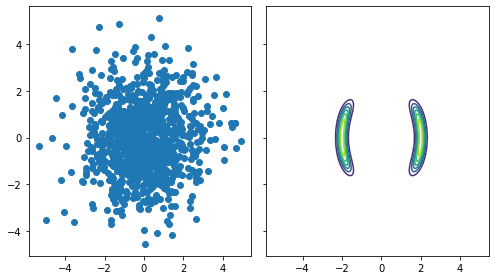

loss: -3.08491805914485, mean log p_x -21.879024793322788:   0%|          | 0/20000 [00:00<?, ?it/s]

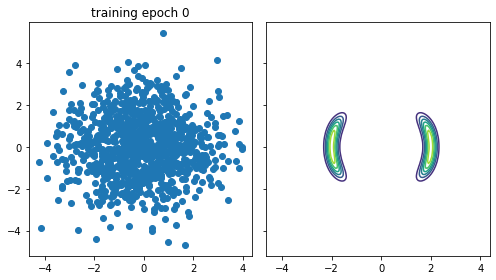

loss: -2.734532247834724, mean log p_x -20.94687483327104:   5%|▌         | 1000/20000 [03:43<1:08:14,  4.64it/s] 

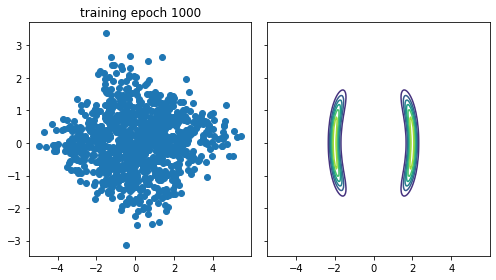

loss: -2.4644561173285306, mean log p_x -16.138927163011168:  10%|█         | 2000/20000 [07:25<1:05:27,  4.58it/s]

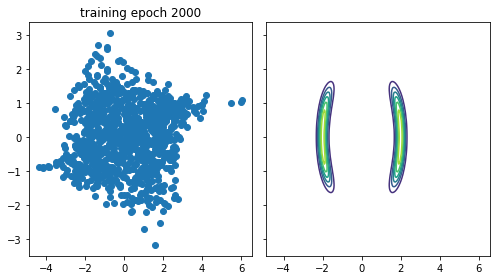

loss: -1.305331566505127, mean log p_x -6.1480552203473815:  15%|█▌        | 3000/20000 [11:11<1:21:05,  3.49it/s] 

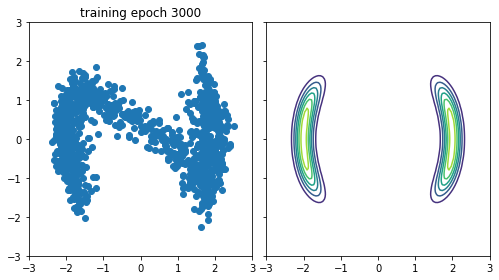

loss: -1.1749140021973283, mean log p_x -4.297762482171756:  20%|██        | 4000/20000 [16:27<1:28:32,  3.01it/s] 

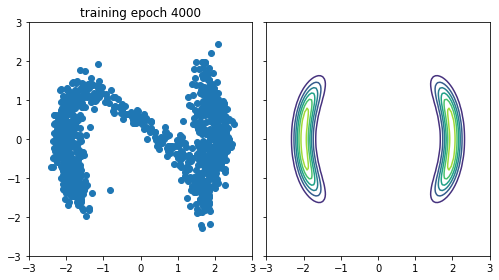

loss: -1.5657203835207325, mean log p_x -3.8126150973505344:  25%|██▌       | 5000/20000 [22:00<1:21:50,  3.05it/s]

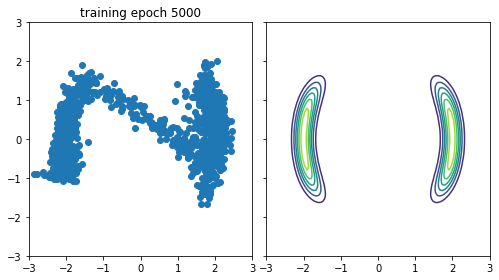

loss: -1.0701799333717055, mean log p_x -3.2874802994017274:  30%|███       | 6000/20000 [27:33<1:21:32,  2.86it/s]

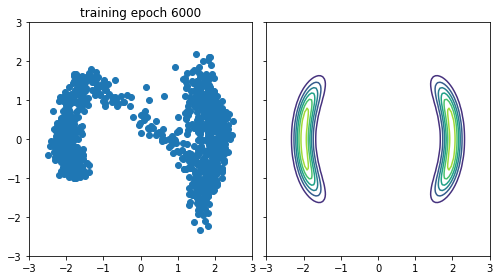

loss: -1.0723442949959052, mean log p_x -3.4330362407525263:  35%|███▌      | 7000/20000 [33:08<1:12:16,  3.00it/s]

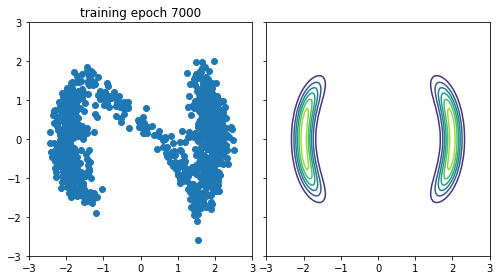

loss: -1.0651226361484167, mean log p_x -3.227527622135788:  40%|████      | 8000/20000 [38:45<1:07:29,  2.96it/s] 

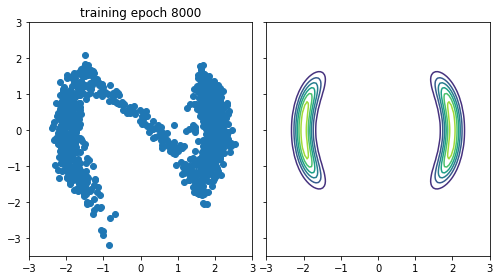

loss: -1.0033371305154328, mean log p_x -3.187403421272495:  45%|████▌     | 9000/20000 [44:21<59:09,  3.10it/s]   

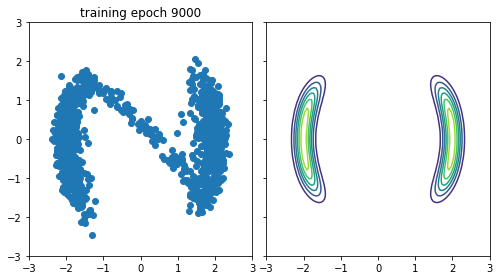

loss: -1.0131439413701944, mean log p_x -2.6679686420067377:  50%|█████     | 10000/20000 [49:56<1:00:08,  2.77it/s]

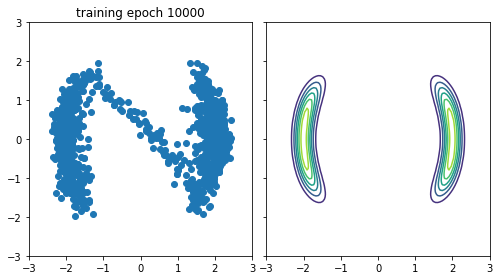

loss: -0.9854001733714315, mean log p_x -3.4231707867512498:  55%|█████▌    | 11000/20000 [54:29<41:09,  3.65it/s]  

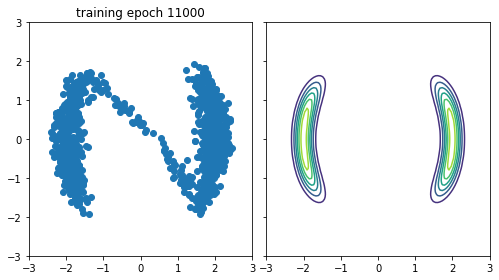

loss: -0.9469440708528445, mean log p_x -2.2640672549787073:  60%|██████    | 12000/20000 [58:13<29:03,  4.59it/s]  

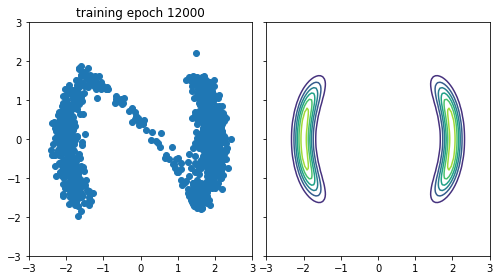

loss: -0.9336112181781411, mean log p_x -2.407008629788977:  65%|██████▌   | 13000/20000 [1:01:50<24:47,  4.71it/s] 

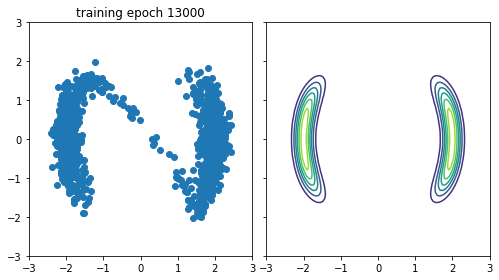

loss: -0.9427727455027775, mean log p_x -2.246266394740308:  70%|███████   | 14000/20000 [1:05:30<21:54,  4.56it/s] 

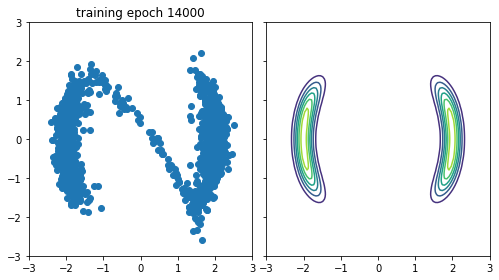

loss: -0.9141001995583264, mean log p_x -1.7426201291921761:  75%|███████▌  | 15000/20000 [1:09:10<17:31,  4.76it/s]

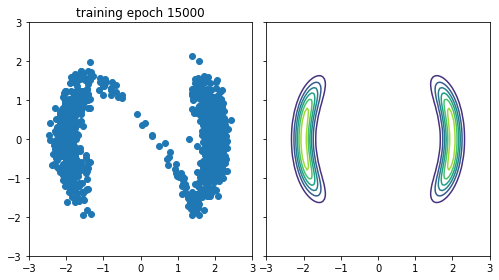

loss: -0.9702021241520735, mean log p_x -1.8009272741129534:  80%|████████  | 16000/20000 [1:12:48<14:01,  4.75it/s]

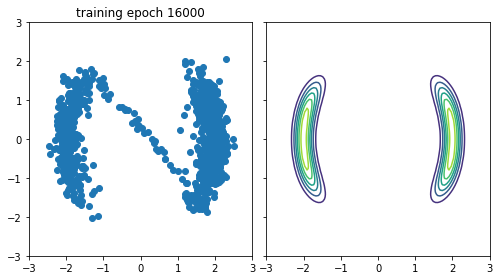

loss: -0.8993141696864544, mean log p_x -1.5204148520293017:  85%|████████▌ | 17000/20000 [1:16:21<10:18,  4.85it/s]

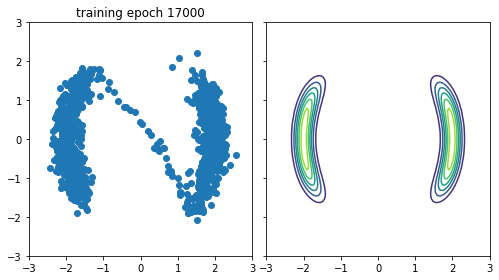

loss: -0.9091467338723593, mean log p_x -1.642942882507336:  90%|█████████ | 18000/20000 [1:19:53<06:55,  4.82it/s] 

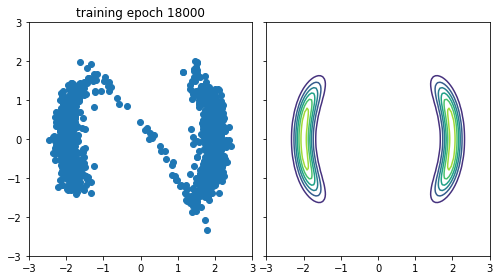

loss: -0.8826270070582214, mean log p_x -2.0194939088423176:  95%|█████████▌| 19000/20000 [1:23:23<03:50,  4.33it/s]

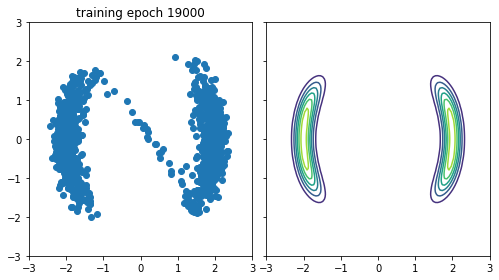

loss: -0.8944231049894885, mean log p_x -1.4729913733499373: 100%|██████████| 20000/20000 [1:26:53<00:00,  3.84it/s]


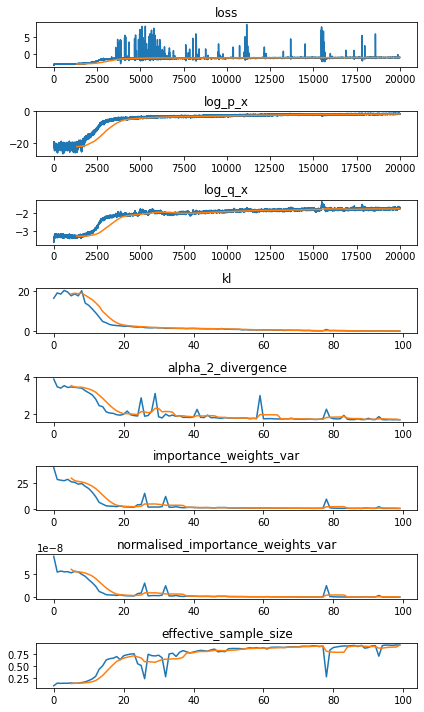

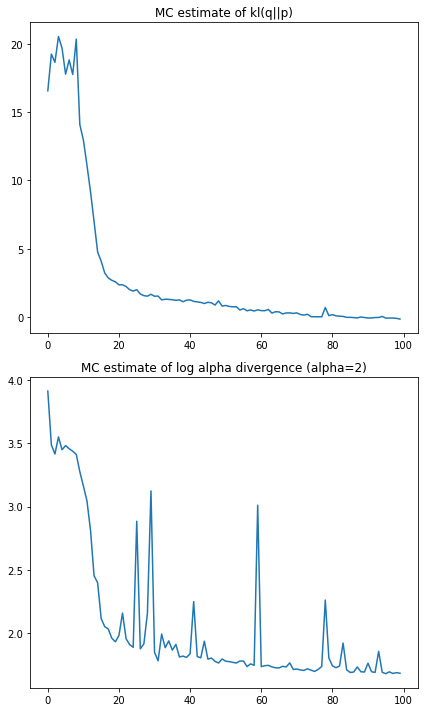

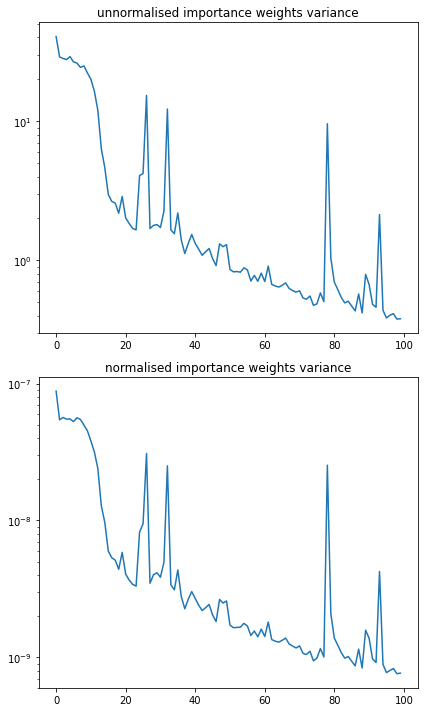

estimate before training is 8.380174767031379 
estimate after training is 8.390566418913226 
effective sample size before is 0.10508900802820097
effective sample size after train is 0.9323439301377929
variance in weights is 7.256629688110598e-12


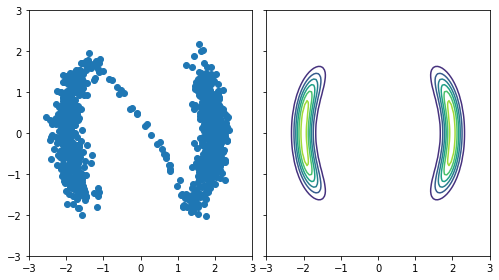

In [11]:
torch.manual_seed(1)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)


if train_prior:
    history_prior = tester.train_prior(epochs=200, batch_size=batch_size, lr=0.01)
    plot_history(history_prior)
    plt.show()
    plot_samples_vs_contours(tester)
    plt.show()
    expectation_prior_trained, info_prior = tester.estimate_expectation(n_samples_estimation, expectation_function)


history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

if train_prior:
    print(f"estimate after prior training is {expectation_prior_trained} \n"
        f"effective sample size trained prior is {info_prior['effective_sample_size'] / n_samples_estimation}\n")

plot_samples_vs_contours(tester, n_samples=1000)
plt.show()